$ \begin{aligned} \large \textbf{Importation des bibliothèques} \end{aligned} $

$ \qquad$ Dans cette section, nous allons importer les bibliothèques Python nécessaires à notre projet, y compris NumPy, Pandas, Matplotlib, Scikit-learn, TensorFlow, Keras, ou d'autres bibliothèques appropriées. Ces bibliothèques nous permettront de charger notre jeu de données, de prétraiter les données, de construire notre modèle de réseau neuronal, d'évaluer les performances de notre modèle, et de faire des prédictions sur de nouvelles données.






In [1]:
import os  # module pour interagir avec le système d'exploitation
import tensorflow as tf  # bibliothèque d'apprentissage en profondeur
# from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError
from tensorflow import keras  # bibliothèque haut niveau pour construire des modèles d'apprentissage en profondeur

from sklearn.model_selection import train_test_split  # pour diviser les données en ensembles d'entraînement et de test
from sklearn.preprocessing import StandardScaler #utilisée pour normaliser ou standardiser les données d'entrée
from tensorflow.keras.models import Sequential  # pour créer des modèles séquentiels
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout  # pour ajouter des couches à notre modèle
from tensorflow.keras import optimizers  # pour sélectionner un optimiseur pour l'apprentissage
import tensorflow_docs as tfdocs  # pour la documentation et les exemples de TensorFlow
import tensorflow_docs.plots  # pour générer des graphiques de la performance du modèle
import tensorflow_docs.modeling # pour la visualisation du modèle
import pathlib  # pour la manipulation de chemin de fichiers
import matplotlib.pyplot as plt  # bibliothèque de visualisation de données
import numpy as np  # bibliothèque de calculs mathématiques avec des tableaux
import pandas as pd  # bibliothèque pour la manipulation de données en tableaux
import seaborn as sns  # bibliothèque pour la visualisation de données statistiques


In [2]:
# la fonction R² 
def r_square(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred)) 
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true))) 
    return (1 - SS_res/(SS_tot + tf.keras.backend.epsilon()))

## Prétraitement des données

Dans cette section, nous allons effectuer le prétraitement des données nécessaires pour entraîner le modèle de régression par réseau de neurones.


## Exploration et visualisation des données:

Dans cette section, nous allons explorer et visualiser les données à l'aide de Matplotlib ou de toute autre bibliothèque appropriée. Nous allons également vérifier s'il y a des corrélations entre les caractéristiques d'entrée et la sortie cible.

In [3]:
# Charger le fichier contenant les données
data = pd.read_csv("data.csv")
data.columns=['E [Gpa]','υ','Conductivité [W/m-K]',"CTE [µm/m-°C]",'Température [°C]','E(T) [Gpa]']

### La matrice de Correlation
Une matrice de corrélation est un outil statistique qui permet de mesurer la relation entre les différentes variables d'un ensemble de données. Elle est couramment utilisée pour identifier les corrélations entre les caractéristiques d'un ensemble de données et peut aider à sélectionner les caractéristiques les plus pertinentes pour une analyse plus approfondie.

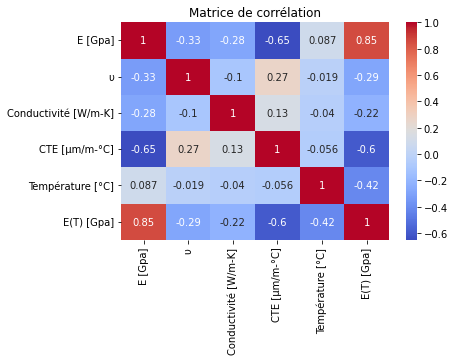

In [8]:
#Obtention de la matrice de correlation entre les variables 
corr_matrix = data.corr()
# Traçage de la matrice de corrélation avec heatmap de Seaborn

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

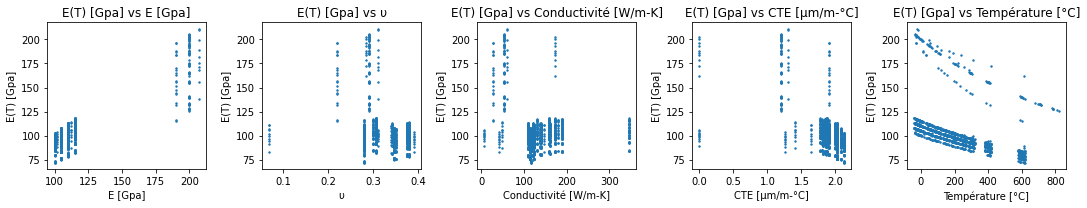

In [33]:
#Traçage des graphes a nuage de points

# Creation de la figure qui portera les graphes 
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

# choix des variables a comparer
subset = data[['E(T) [Gpa]','E [Gpa]','υ','Conductivité [W/m-K]',"CTE [µm/m-°C]",'Température [°C]']]

# creation des graphes
for i, col in enumerate(subset.columns[1:]):
    ax = axes[i]
    ax.scatter(subset[col], subset['E(T) [Gpa]'],s=2)
    ax.set_xlabel(col)
    ax.set_ylabel('E(T) [Gpa]')
    
    ax.set_title('E(T) [Gpa] vs ' + col)

# Adjust the spacing between subplots
plt.tight_layout()


# Show the figure
plt.show()

## Pretraitement et Transformation des donnes 

In [4]:
# Charger le fichier contenant les données
data = pd.read_csv("data.csv")
data.columns=['E [Gpa]','υ','Conductivité [W/m-K]',"CTE [µm/m-°C]",'Température [°C]','E(T) [Gpa]']

# Appliquer la fonction logarithme naturel à la colonne 'E(T) [Gpa]'
data['log("E(T) [Gpa]")'] = np.log(data['E(T) [Gpa]'])

#Supprimer la colonne d'origine 'E(T) [Gpa]'
data.drop(columns=['E(T) [Gpa]'], inplace=True)

#supression des colonnes de variables a faible correlation 
data.drop(columns=['Conductivité [W/m-K]'], inplace=True)
data.drop(columns=['υ'], inplace=True)


# Diviser les données en entrées (X) et sortie (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# Construction du modèle de réseau de neurones



In [5]:
# definition de l'architecture du modele (nombre de couches,fonction d'activation,optimisateur ...etc)

model = keras.Sequential([
    keras.layers.Dense(3, activation='relu', input_shape=(3,)),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(36, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1)
])

# Choix d'optimisateur et de la fonction de perte
optimizer = keras.optimizers.Adam()
loss_fn = keras.losses.MeanSquaredError()

# compilation du model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['mae'])

# Entrainement du model
history = model.fit(X_train, y_train, epochs=15000, validation_split=0.3)


Epoch 1/15000
25/25 [==============================] - 2s 20ms/step - loss: 20.1794 - mae: 4.4449 - val_loss: 14.8167 - val_mae: 3.7228
Epoch 2/15000
25/25 [==============================] - 0s 5ms/step - loss: 13.8812 - mae: 3.4249 - val_loss: 12.0396 - val_mae: 3.0650
Epoch 3/15000
25/25 [==============================] - 0s 5ms/step - loss: 12.6092 - mae: 3.1967 - val_loss: 11.3172 - val_mae: 2.9385
Epoch 4/15000
25/25 [==============================] - 0s 6ms/step - loss: 11.6782 - mae: 3.0257 - val_loss: 10.7031 - val_mae: 2.8511
Epoch 5/15000
25/25 [==============================] - 0s 6ms/step - loss: 10.5781 - mae: 2.8697 - val_loss: 9.4098 - val_mae: 2.6074
Epoch 6/15000
25/25 [==============================] - 0s 5ms/step - loss: 8.8102 - mae: 2.5142 - val_loss: 7.6412 - val_mae: 2.1869
Epoch 7/15000
25/25 [==============================] - 0s 5ms/step - loss: 6.9379 - mae: 2.0533 - val_loss: 5.8531 - val_mae: 1.8888
Epoch 8/15000
25/25 [==============================] - 0s 5

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Obtention des valeurs predites et valeurs de reference (réeles)
y_pred = model.predict(X_test)
y_true = y_test

# Calcule de l'erreur et le score de determination 
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Affichage des resultats
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R² Score:', r2)

Mean Squared Error: 3.7615351293188134e-05
Mean Absolute Error: 0.002894223702662156
R² Score: 0.9986710842541267


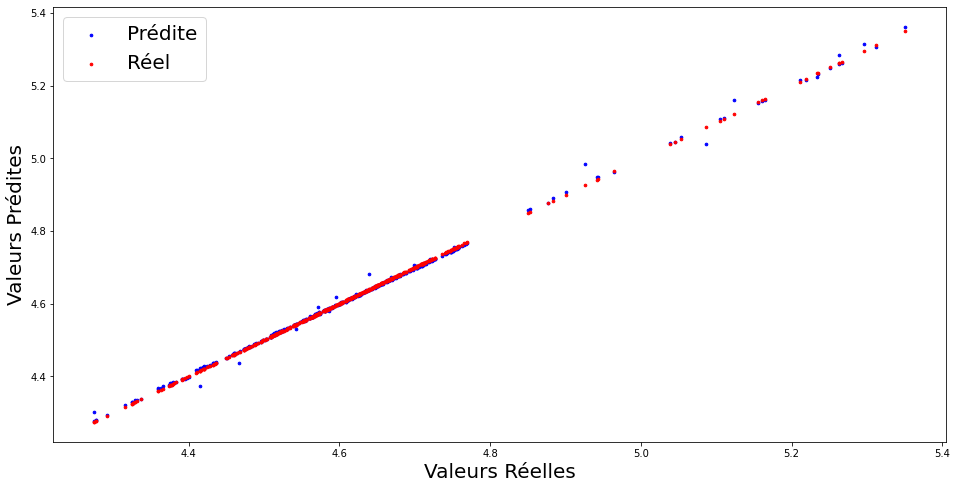

In [7]:
# Obtenir les valeurs prédites et réelles
y_pred = model.predict(X_test)
y_true = y_test

# Créer un graphique en nuage de points
fig = plt.figure(figsize=(16, 8))
plt.scatter(y_true, y_pred,s=7, color='blue', label='Prédite')
plt.scatter(y_true, y_true,s=7, color='red', label='Réel')

# Ajouter des étiquettes d'axes et une légende
plt.xlabel('Valeurs Réelles',fontdict={'size':20})
plt.ylabel('Valeurs Prédites',fontdict={'size':20})
plt.legend()
legend = plt.legend(fontsize=20)
# legend.set_bbox_to_anchor((1.2, 1))

# Afficher le graphique
plt.show()

Ce graphique montre que les valeurs prédites sont très proches des valeurs réelles/expérimentales et que le modèle suit la même tendance que les valeurs réelles. Cela est un indicateur que le modèle est capable de faire des prédictions acceptables et qu'il peut être utilisé pour des applications réelles.


In [12]:
#sauvgarder les poids et biais sous une forme brute
with open('wb','w') as k:
    k.write(str(model.weights))
    k.close()

In [ ]:
#sauvgarder les poids et biais sous le format h5
model.save('wb.h5')